In [1]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import sys
import scipy.stats as st
from sklearn.preprocessing import LabelEncoder
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_pickle (" fraud.pkl ")
df

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
0,512217,interest,150000,iOS,video,True
1,833649,interest,150000,Android,video,True
2,327813,interest,150002,Android,video,True
3,241345,interest,150004,iOS,video,True
4,212554,interest,150004,Android,video,True
...,...,...,...,...,...,...
130596,704762,consideration,200781,iOS,native,True
130597,659956,consideration,200792,iOS,native,True
130598,500938,consideration,200843,iOS,native,True
130599,388053,purchase,201095,Android,native,False


In [3]:
df_interest = df.loc[df['funnel_stage'].isin(['interest'])]
df_interest

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
0,512217,interest,150000,iOS,video,True
1,833649,interest,150000,Android,video,True
2,327813,interest,150002,Android,video,True
3,241345,interest,150004,iOS,video,True
4,212554,interest,150004,Android,video,True
...,...,...,...,...,...,...
130466,714188,interest,199980,iOS,native,True
130469,542250,interest,199985,iOS,native,True
130470,186549,interest,199988,Android,native,True
130471,298294,interest,199989,iOS,native,True


In [4]:
df_purchase = df.loc[df['funnel_stage'].isin(['purchase'])]
df_purchase

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
346,941001,purchase,150029,iOS,search,False
882,727830,purchase,150059,Android,search,False
933,638226,purchase,150072,iOS,search,False
1655,962335,purchase,150117,iOS,search,False
2236,546232,purchase,150131,iOS,search,False
...,...,...,...,...,...,...
730447,874686,purchase,201579,iOS,banner,False
730449,1057997,purchase,201679,iOS,banner,False
7084,403423,purchase,152605,iOS,native,False
124450,36452,purchase,198275,Android,native,False


In [5]:
df_consideration = df.loc[df['funnel_stage'].isin(['consideration'])]
df_consideration

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
10,330668,consideration,150007,iOS,video,True
48,509959,consideration,150019,Android,video,True
691,907228,consideration,150049,Android,video,True
1863,204882,consideration,150073,Android,video,True
1912,341532,consideration,150099,Android,video,True
...,...,...,...,...,...,...
130594,626803,consideration,200756,iOS,native,True
130595,834957,consideration,200777,iOS,native,True
130596,704762,consideration,200781,iOS,native,True
130597,659956,consideration,200792,iOS,native,True


In [6]:
df_intent = df.loc[df['funnel_stage'].isin(['intent'])]
df_intent

,user_id,funnel_stage,timestamp,os,ad_channel,profit_nan
9291,968214,intent,150646,Android,video,True
33430,494008,intent,152759,Android,video,True
710978,436319,intent,199921,Android,video,True
711961,426023,intent,200216,iOS,video,True
9,484260,intent,150002,iOS,search,True
...,...,...,...,...,...,...
130515,685816,intent,200184,iOS,native,True
130530,388053,intent,200270,iOS,native,True
130546,887370,intent,200364,Android,native,True
130547,862902,intent,200366,Android,native,True


In [7]:
data_intent = df_intent.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

In [8]:
data_consideration= df_consideration.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

In [9]:
data_interest= df_interest.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

In [10]:
data_purchase= df_purchase.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))
data_purchase

,funnel_stage,count_purchase
0,purchase,735


In [11]:
data_channel = df.groupby('funnel_stage',as_index=False).agg(
count_channel = ('funnel_stage','count'))
data_channel

,funnel_stage,count_channel
0,consideration,35924
1,intent,35650
2,interest,350258
3,purchase,735


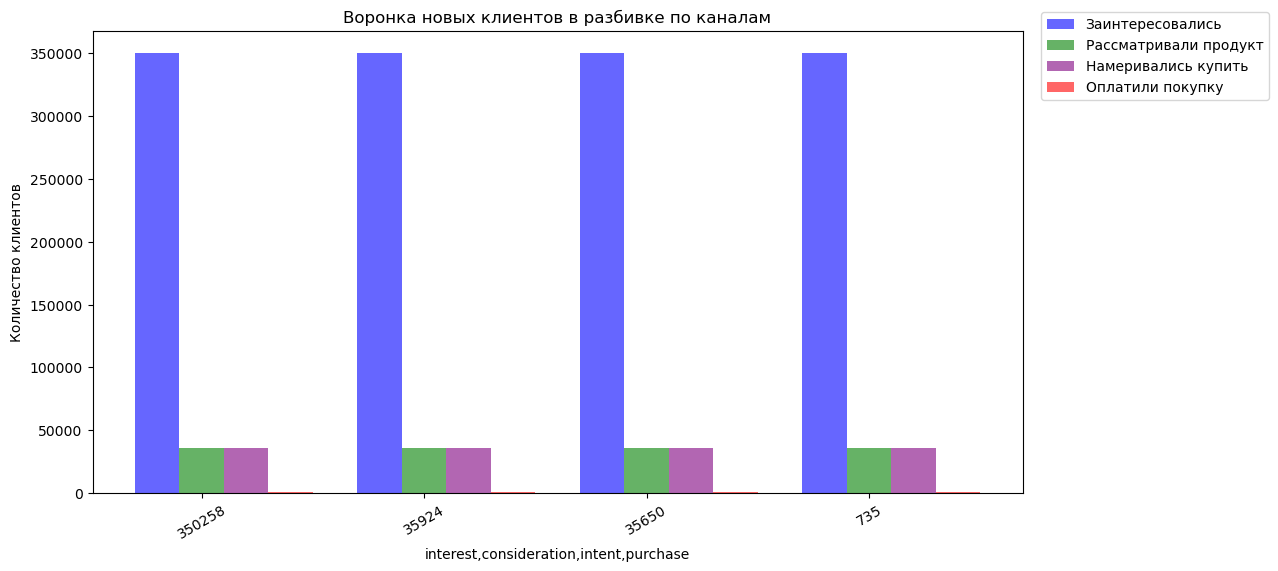

In [12]:
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase
channel = data_channel.count_channel
utms = df.funnel_stage.value_counts()

bar_width=0.2
index = np.arange(len(utms))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('interest,consideration,intent,purchase')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(utms)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Конверсия в покупку очень мала,на этапе когда клиент уже намеревается купить большинство клиентов уходит,стоит обратить внимание на улучшение удержания на этапах заинтересованности и на этапах намеревания к покупке

In [13]:
df_clean = pd.read_pickle (" marketing_clean.pkl ")
df_clean

,user_id,funnel_stage,timestamp,profit,os,ad_channel
35135,143761,consideration,152951,0.0,iOS,video
35136,718464,interest,152951,0.0,Android,video
35137,967495,consideration,152951,0.0,Android,video
35138,957953,interest,152951,0.0,Android,video
35139,96984,consideration,152951,0.0,iOS,video
...,...,...,...,...,...,...
123903,1043694,interest,198250,0.0,iOS,native
123904,373644,interest,198251,0.0,iOS,native
123905,90066,interest,198253,0.0,iOS,native
123906,114369,consideration,198254,0.0,iOS,native


In [14]:
df_clean_video =  df_clean.loc[df_clean['ad_channel'].isin(['video'])]

In [15]:
df_clean_video_count = df_clean_video.groupby('ad_channel',as_index=False).agg(
count_video = ('ad_channel','count'))

In [16]:
df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

In [17]:
data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

In [18]:
df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

In [19]:
data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

In [20]:
df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

In [21]:
data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

In [22]:
df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

In [23]:
data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))

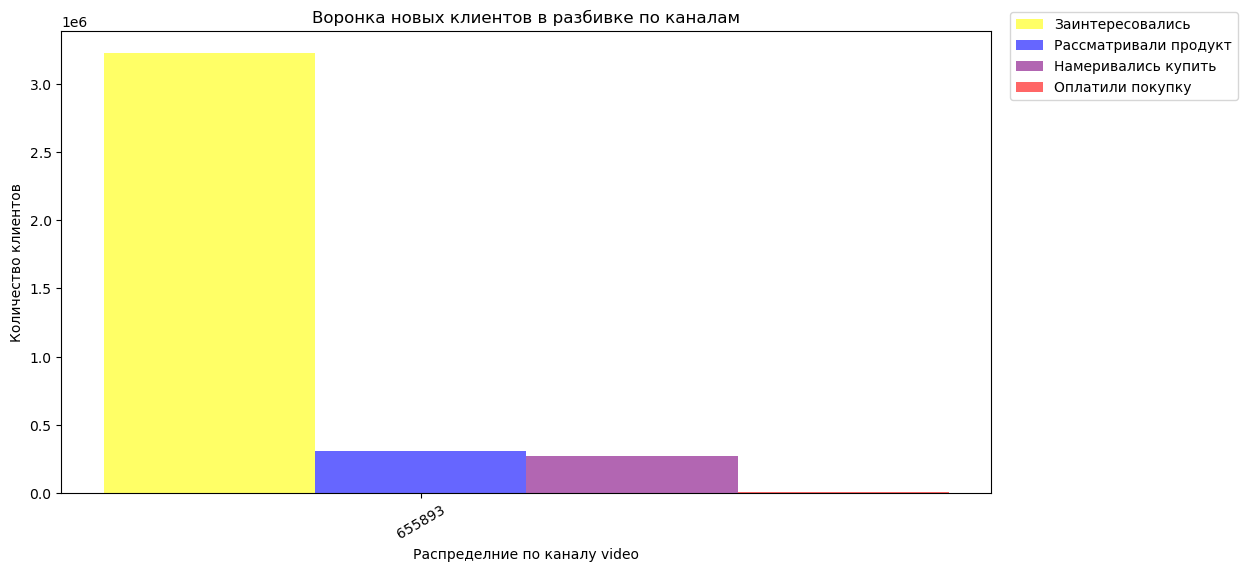

In [53]:

video = df_clean_video_count.count_video
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(video))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='yellow', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='blue', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу video')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(video)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [25]:
df_clean_other =  df_clean.loc[df_clean['ad_channel'].isin(['other'])]

df_clean_other_count = df_clean_other.groupby('ad_channel',as_index=False).agg(
count_other = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


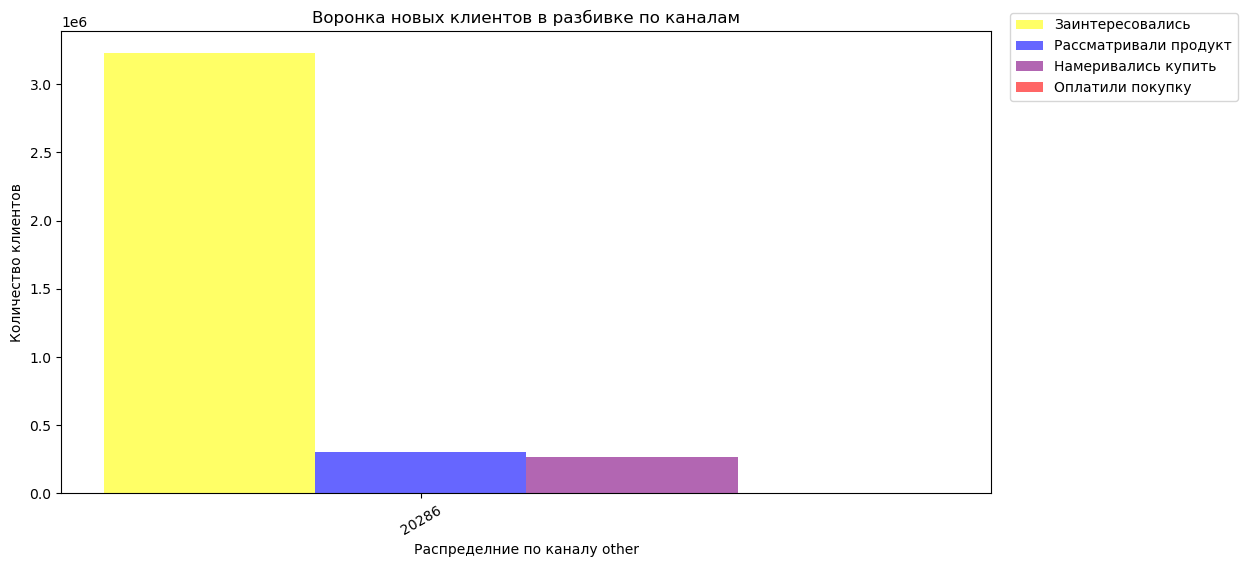

In [54]:
other = df_clean_other_count.count_other
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(other))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='yellow', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='blue', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу other')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(other)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### конверсию в покупку почти не видно,стоит расчитытать целесообразен ли канал,путем рсчета прибыли по нему

In [27]:
df_clean_search =  df_clean.loc[df_clean['ad_channel'].isin(['search'])]

df_clean_search_count = df_clean_search.groupby('ad_channel',as_index=False).agg(
count_search = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


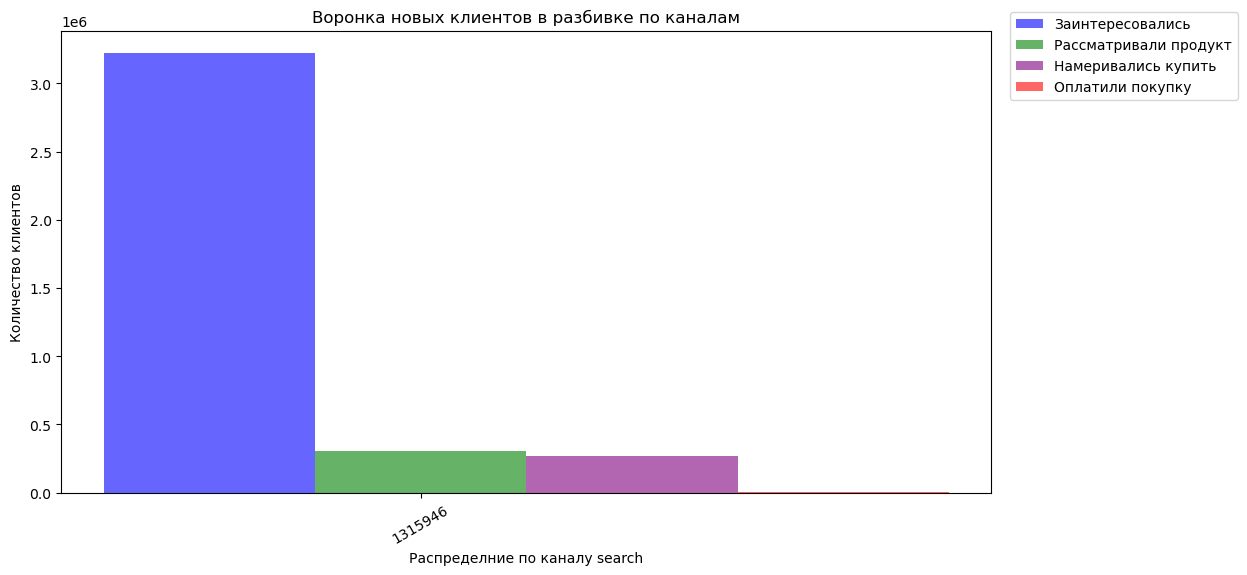

In [28]:
search = df_clean_search_count.count_search
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(search))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу search')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(search)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [29]:
df_clean_banner =  df_clean.loc[df_clean['ad_channel'].isin(['banner'])]

df_clean_banner_count = df_clean_banner.groupby('ad_channel',as_index=False).agg(
count_banner = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


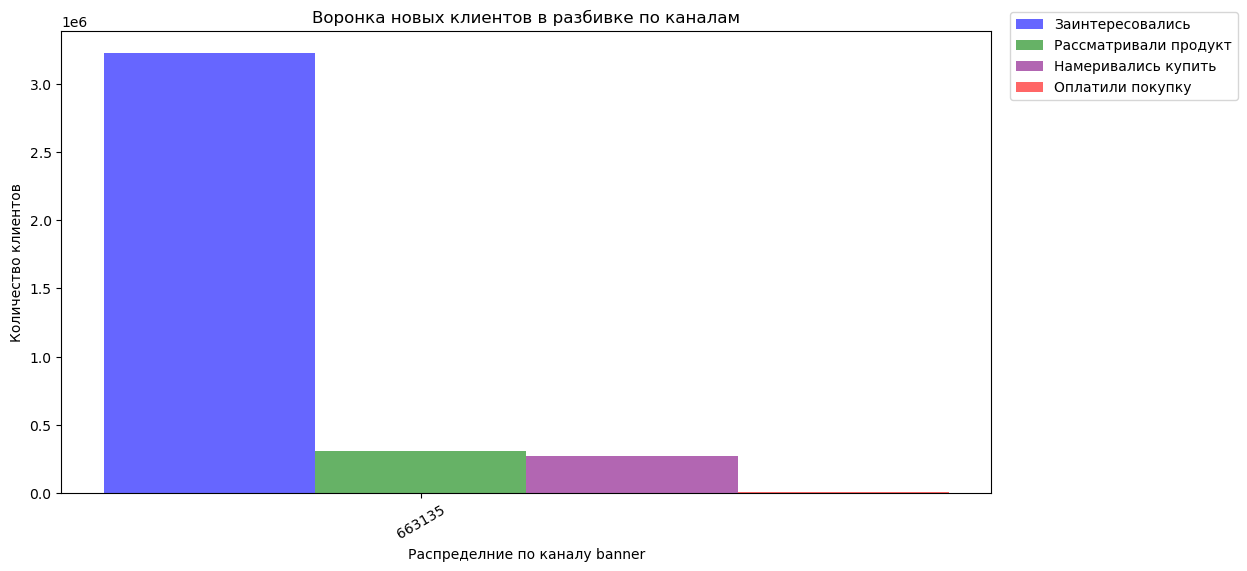

In [30]:
banner = df_clean_banner_count.count_banner
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(banner))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу banner')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(banner)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [31]:
df_clean_organic_traffic =  df_clean.loc[df_clean['ad_channel'].isin(['organic_traffic'])]

df_clean_organic_traffic_count = df_clean_organic_traffic.groupby('ad_channel',as_index=False).agg(
count_organic_traffic = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


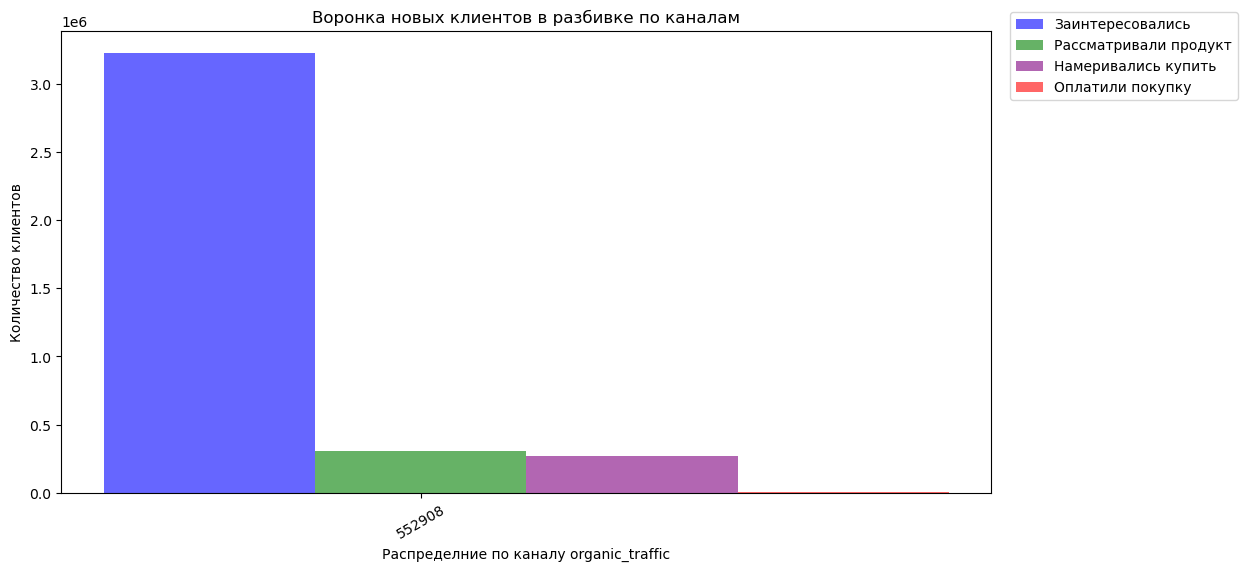

In [32]:
organic_traffic = df_clean_organic_traffic_count.count_organic_traffic
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(organic_traffic))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу organic_traffic')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(organic_traffic)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [33]:
df_clean_partner_network =  df_clean.loc[df_clean['ad_channel'].isin(['partner_network'])]

df_clean_partner_network_count = df_clean_partner_network.groupby('ad_channel',as_index=False).agg(
count_partner_network = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


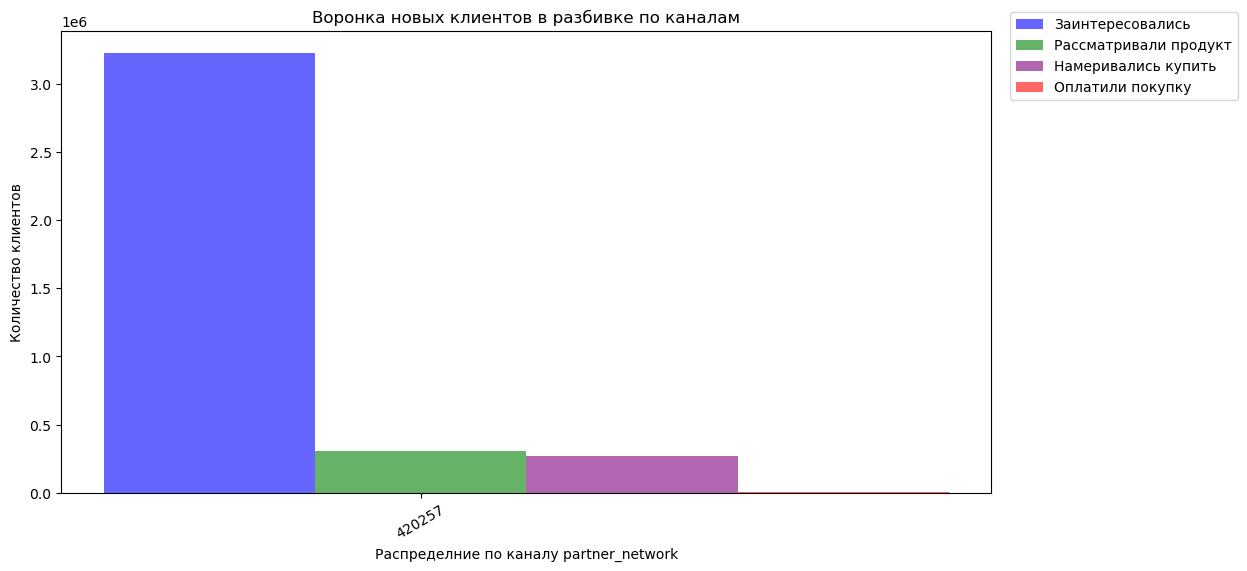

In [34]:
partner_network = df_clean_partner_network_count.count_partner_network
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(partner_network))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу partner_network')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(partner_network)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [35]:
df_clean_native =  df_clean.loc[df_clean['ad_channel'].isin(['native'])]

df_clean_native_count = df_clean_native.groupby('ad_channel',as_index=False).agg(
count_native = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


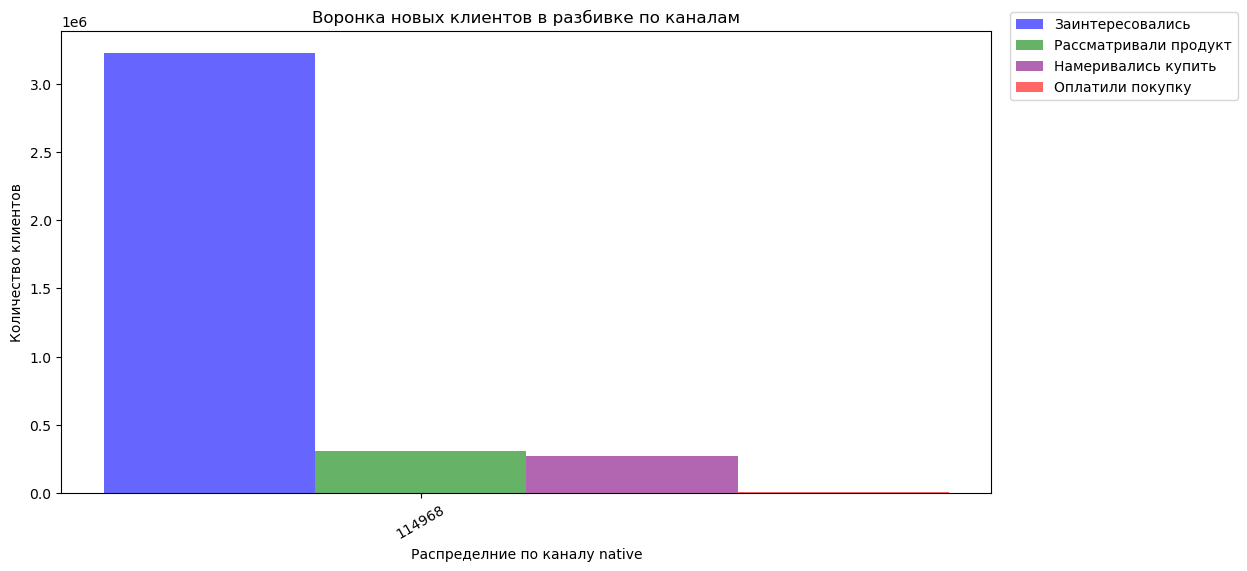

In [36]:
native = df_clean_native_count.count_native
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(native))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу native')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(native)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### Видна небольшая,но присутствующая конверсия в покупку,стоит расчитытать целесообразен ли канала,путем рсчета прибыли

In [37]:
df_clean_rich =  df_clean.loc[df_clean['ad_channel'].isin(['rich'])]

df_clean_rich_count = df_clean_rich.groupby('ad_channel',as_index=False).agg(
count_rich = ('ad_channel','count'))

df_interest_clean = df_clean.loc[df_clean['funnel_stage'].isin(['interest'])]

data_interest = df_interest_clean.groupby('funnel_stage',as_index=False).agg(
count_interest = ('funnel_stage','count'))

df_consideration_clean = df_clean.loc[df_clean['funnel_stage'].isin(['consideration'])]

data_consideration = df_consideration_clean.groupby('funnel_stage',as_index=False).agg(
count_consideration = ('funnel_stage','count'))

df_intent_clean = df_clean.loc[df_clean['funnel_stage'].isin(['intent'])]

data_intent = df_intent_clean.groupby('funnel_stage',as_index=False).agg(
count_intent = ('funnel_stage','count'))

df_purchase_clean = df_clean.loc[df_clean['funnel_stage'].isin(['purchase'])]

data_purchase = df_purchase_clean.groupby('funnel_stage',as_index=False).agg(
count_purchase = ('funnel_stage','count'))


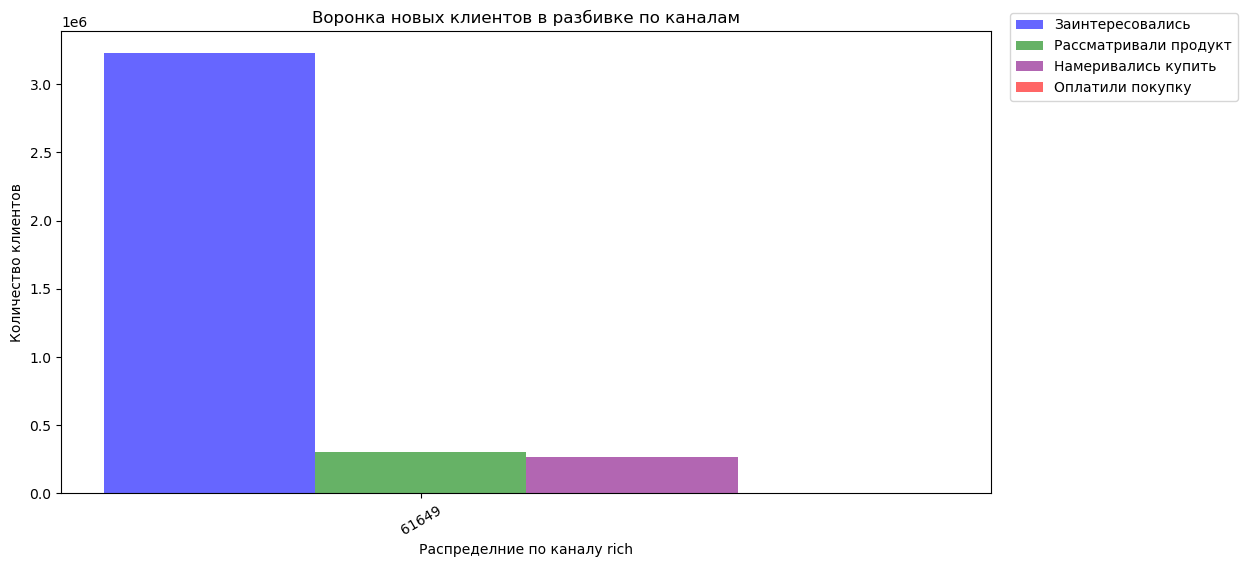

In [38]:
rich = df_clean_rich_count.count_rich
intent = data_intent.count_intent
consideration = data_consideration.count_consideration
interest = data_interest.count_interest
purchase = data_purchase.count_purchase

bar_width=0.2
index = np.arange(len(rich))

fig,ax = plt.subplots(figsize=(12,6))

ax.bar(index, interest, bar_width,
        color='blue', alpha=0.6,
        label= 'Заинтересовались')

ax.bar(index+bar_width,consideration , bar_width,
        color='green', alpha=0.6,
        label= 'Рассматривали продукт')

ax.bar(index+2*bar_width,intent , bar_width,
        color='purple', alpha=0.6,
        label= 'Намеривались купить')

ax.bar(index+3*bar_width,purchase , bar_width,
        color='red', alpha=0.6,
        label= 'Оплатили покупку')

ax.set_xlabel('Распределние по каналу rich')
ax.set_ylabel('Количество клиентов')
ax.set_title('Воронка новых клиентов в разбивке по каналам')

ax.set_xticks(index + bar_width)
ax.set_xticklabels(rich)
ax.tick_params(axis='x', labelrotation=30)
ax.legend(loc= (1.02, 0.85))

plt.show()

### конверсию в покупку почти не видно,стоит расчитытать целесообразен ли канал,путем рсчета прибыли по нему

In [39]:
price = pd.read_json('Копия advertising_information.json')
price.head

<bound method NDFrame.head of         ad_channel  price
0           search   1.50
1           banner   0.50
2            video   0.75
3           native   2.00
4  partner_network   1.00
5             rich   2.50
6  organic_traffic   0.00
7            other    NaN>

In [40]:
def price_add(row):
    if row['ad_channel'] == 'search':
        return 1.50
    elif row['ad_channel'] == 'banner':
        return 0.50
    elif row['ad_channel'] == 'video':
        return 0.75
    elif row['ad_channel'] == 'native':
        return 2.00
    elif row['ad_channel'] == 'partner_network':
        return 1.00
    elif row['ad_channel'] == 'rich':
        return 2.50
    elif row['ad_channel'] == 'organic_traffic':
        return 0.00
    
df_clean['price']=df_clean.apply(price_add,axis=1)

In [41]:
df_clean

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
35135,143761,consideration,152951,0.0,iOS,video,0.75
35136,718464,interest,152951,0.0,Android,video,0.75
35137,967495,consideration,152951,0.0,Android,video,0.75
35138,957953,interest,152951,0.0,Android,video,0.75
35139,96984,consideration,152951,0.0,iOS,video,0.75
...,...,...,...,...,...,...,...
123903,1043694,interest,198250,0.0,iOS,native,2.00
123904,373644,interest,198251,0.0,iOS,native,2.00
123905,90066,interest,198253,0.0,iOS,native,2.00
123906,114369,consideration,198254,0.0,iOS,native,2.00


In [42]:
df_clean_benefit = df_clean.groupby('ad_channel',as_index=False).agg(price_sum = ("price",'sum'),
profit_sum = ('profit','sum'))
df_clean_benefit

,ad_channel,price_sum,profit_sum
0,banner,331567.50,433141.0
1,native,229936.00,28489.0
2,organic_traffic,0.00,339621.0
3,other,0.00,22567.0
4,partner_network,420257.00,430698.0
5,rich,154122.50,28202.0
6,search,1973919.00,1704668.0
7,video,491919.75,3595.0


Text(0, 0.5, 'Сумма затрат и прибыли')

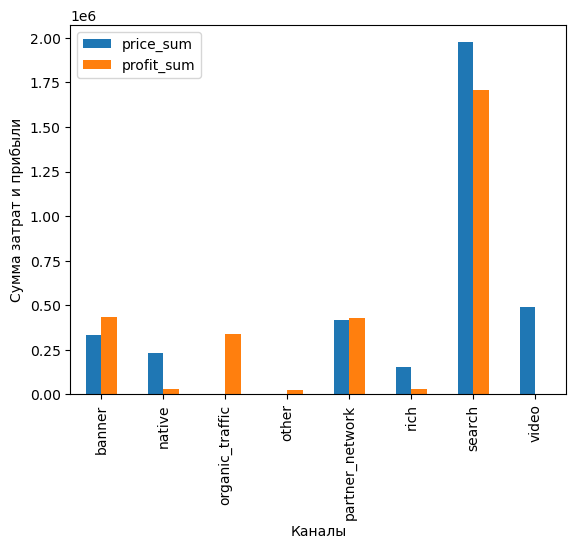

In [43]:

axes=df_clean_benefit.plot.bar('ad_channel')
plt.xlabel("Каналы")
plt.ylabel("Сумма затрат и прибыли")

### На графике видно какие каналы нецелесообразны,они приносят больше расходов,чем доходов,это каналы:native,rich,video,search

In [48]:
df_clean_os = df_clean[['os','ad_channel']]
df_clean_iOS = df_clean_os.loc[df_clean_os['os'].isin(['iOS'])]
df_clean_andro = df_clean_os.loc[df_clean_os['os'].isin(['Android'])]
df_clean_iOS = df_clean_iOS.groupby('ad_channel',as_index=False).agg(ios_sum = ("os",'count'))
df_clean_andro = df_clean_andro.groupby('ad_channel',as_index=False).agg(android_sum = ("os",'count'))

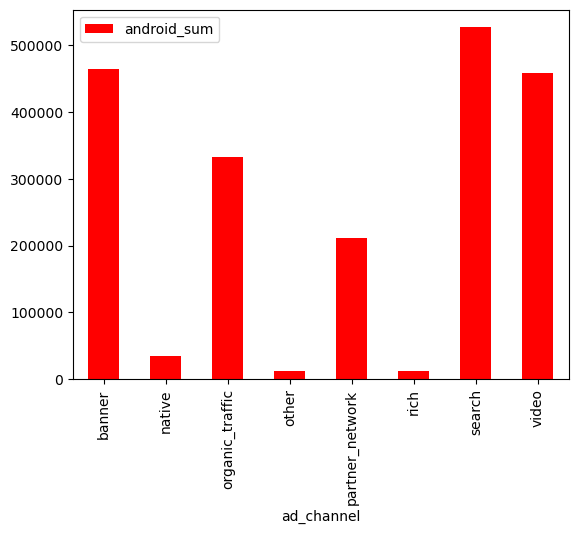

In [56]:
android = df_clean_andro.plot.bar('ad_channel',color = 'red')

### На графике видно,что большое количество клиентов приходит к нам с операционной системой андроид,в основоном из источников:banner,search,video.Стоит развивать эти источники,но только релевантные по прибыли из них

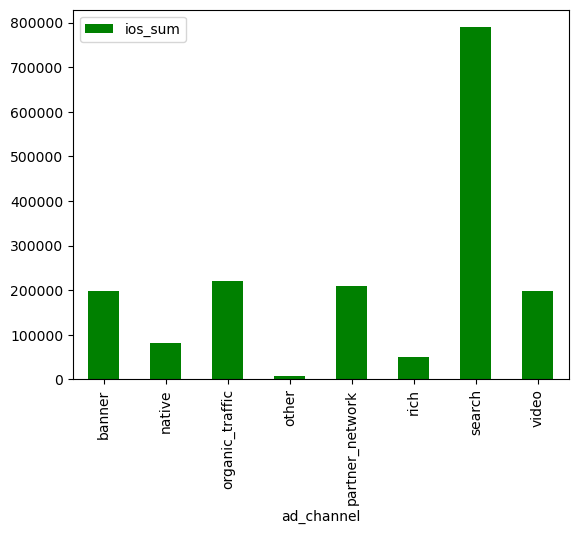

In [57]:
iOS = df_clean_iOS.plot.bar('ad_channel',color='green')

### На графике видно,что основные пользователи с ios  приходят из источника serch,при этом по этому источнику больше затрат,чем прибыли,поэтому стоит обратить внимание на развитие других каналов

## Выводы: На основе графиков иллюстрирующих операционные системы,можно сделать выводы о том,что больше приток клиентов с операционной системой андроид,при этом они(пользователи с андроид) больше приходят из более дешевых каналов привлечения,пользоватаелй с ios меньше,но они приходят с более дорогих каналов 